In [127]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [128]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [129]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect
from flask import Flask, jsonify

In [130]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [131]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [132]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [133]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [134]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [135]:
 #Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [136]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

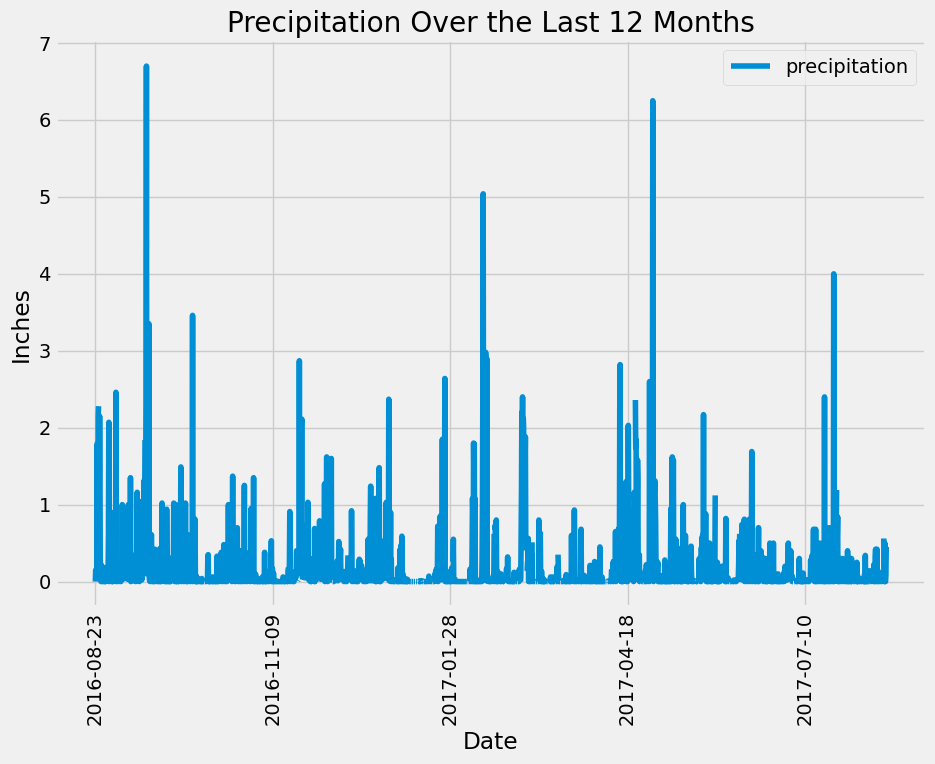

In [151]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

last_one_year= dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
last_date = dt.date(last_one_year.year, last_one_year.month, last_one_year.day)
# Perform a query to retrieve the data and precipitation scores

# Perform a query to retrieve the data and precipitation scores
precipitation_analysis = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitatation_analysis_df= data_df.dropna()
precipitation_analysis_df = pd.DataFrame(precipitation_analysis, columns=['date', 'precipitation'])
precipitation_analysis_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_analysis_df = precipitation_analysis_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_analysis_df.plot(rot=90,figsize=(12,6), label="precipitation")
plt.title("Precipitation Over the Last 12 Months")
plt.ylabel("Inches")
plt.xlabel("Date")
plt.savefig('Precipitation.png',bbox_inches='tight')
plt.show()

In [142]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [143]:
 #Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [144]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [145]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [146]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel = [Measurement.date, 
       Measurement.tobs]
station_observ_temps = session.query(*sel).\
        filter(func.strftime(Measurement.date) >= last_date, Measurement.station == 'USC00519281').\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()

# Create a datafrem containing the results of this query
station_observ_temps_df = pd.DataFrame(station_observ_temps, columns=['Measurement Date', 'Temperature'])
station_observ_temps_df.head()


,Measurement Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


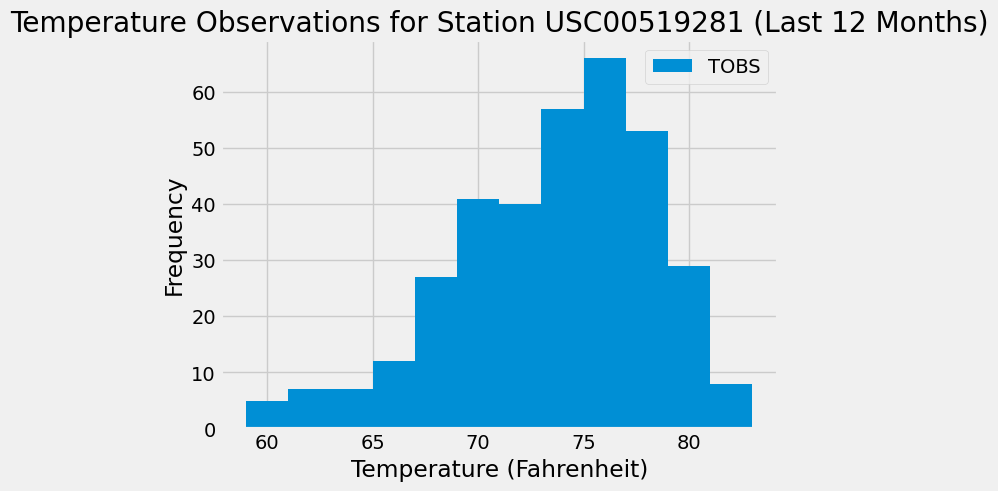

In [149]:
# Create a histogram to visualize the temperature observations from Station USC00519281 

plt.hist(station_observ_temps_df['Temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Temperature Observations for Station USC00519281 (Last 12 Months)")
plt.figsize=(10,7)
plt.savefig('Temps_Observations.png',bbox_inches='tight')
plt.show()

# Close Session

In [150]:
# Close Session
session.close()